In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df1=pd.read_csv("D://mamta/mobility_train.csv")
df2=pd.read_csv("D://mamta/mobility_test.csv")
df=pd.concat([df1,df2],keys=("train","test"))

In [24]:
df.shape

(219057, 29)

In [2]:
df.head(10)

Trip_ID  Trip_Distance Type_of_Cab  Customer_Since_Months  \
train 0  T0005689460           6.77           B                    1.0   
      1  T0005689461          29.47           B                   10.0   
      2  T0005689464          41.58         NaN                   10.0   
      3  T0005689465          61.56           C                   10.0   
      4  T0005689467          54.95           C                   10.0   
      5  T0005689469          19.06           E                   10.0   
      6  T0005689470          29.72           E                   10.0   
      7  T0005689472          18.44           B                    2.0   
      8  T0005689473         106.80           C                    3.0   
      9  T0005689474         107.19           D                    5.0   

         Life_Style_Index Confidence_Life_Style_Index Destination_Type  \
train 0           2.42769                           A                A   
      1           2.78245                           B                A   
      2               NaN                         NaN                E   
      3               NaN                         NaN                A   
      4           3.03453                           B                A   
      5               NaN                         NaN                A   
      6           2.83958                           C                B   
      7           2.81871                           B                A   
      8               NaN                         NaN                A   
      9           3.04467                           B                A   

         Customer_Rating  Cancellation_Last_1Month   Var1  Var2  Var3  Gender  \
train 0          3.90500                         0   40.0    46    60  Female   
      1          3.45000                         0   38.0    56    78    Male   
      2          3.50125                         2    NaN    56    77    Male   
      3          3.45375                         0    NaN    52    74    Male   
      4          3.40250                         4   51.0    49   102    Male   
      5          2.59750                         1   72.0    63    91    Male   
      6          2.97500                         1   83.0    50    75    Male   
      7          3.58250                         0  103.0    46    63    Male   
      8          3.14625                         0    NaN    58    92    Male   
      9          2.44375                         1    NaN    58    83    Male   

         Surge_Pricing_Type  
train 0                 2.0  
      1                 2.0  
      2                 2.0  
      3                 3.0  
      4                 2.0  
      5                 3.0  
      6                 2.0  
      7                 2.0  
      8                 2.0  
      9                 3.0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 219057 entries, ('train', 0) to ('test', 87394)
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      219057 non-null  object 
 1   Trip_Distance                219057 non-null  float64
 2   Type_of_Cab                  185689 non-null  object 
 3   Customer_Since_Months        209171 non-null  float64
 4   Life_Style_Index             185537 non-null  float64
 5   Confidence_Life_Style_Index  185537 non-null  object 
 6   Destination_Type             219057 non-null  object 
 7   Customer_Rating              219057 non-null  float64
 8   Cancellation_Last_1Month     219057 non-null  int64  
 9   Var1                         101238 non-null  float64
 10  Var2                         219057 non-null  int64  
 11  Var3                         219057 non-null  int64  
 12  Gender                       219057 no

In [4]:
df.Confidence_Life_Style_Index.value_counts()

B    67265
C    59736
A    58536
Name: Confidence_Life_Style_Index, dtype: int64

In [5]:
df.isnull().sum()

Trip_ID                             0
Trip_Distance                       0
Type_of_Cab                     33368
Customer_Since_Months            9886
Life_Style_Index                33520
Confidence_Life_Style_Index     33520
Destination_Type                    0
Customer_Rating                     0
Cancellation_Last_1Month            0
Var1                           117819
Var2                                0
Var3                                0
Gender                              0
Surge_Pricing_Type              87395
dtype: int64

In [6]:
df.corr()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
Trip_Distance,1.000000,0.118103,0.510069,-0.055700,-0.007378,-0.041811,0.203148,0.233022,0.135928
Customer_Since_Months,0.118103,1.000000,0.135711,-0.050945,-0.007099,-0.008565,0.041820,0.114581,0.027827
Life_Style_Index,0.510069,0.135711,1.000000,0.206346,0.074902,-0.088002,0.233877,0.329218,-0.080108
Customer_Rating,-0.055700,-0.050945,0.206346,1.000000,0.004167,-0.010082,-0.303443,-0.229899,-0.155279
Cancellation_Last_1Month,-0.007378,-0.007099,0.074902,0.004167,1.000000,0.013526,0.098944,0.130950,0.185646
Var1,-0.041811,-0.008565,-0.088002,-0.010082,0.013526,1.000000,-0.048249,-0.059432,-0.040735
Var2,0.203148,0.041820,0.233877,-0.303443,0.098944,-0.048249,1.000000,0.682716,0.003437
Var3,0.233022,0.114581,0.329218,-0.229899,0.130950,-0.059432,0.682716,1.000000,-0.039309
Surge_Pricing_Type,0.135928,0.027827,-0.080108,-0.155279,0.185646,-0.040735,0.003437,-0.039309,1.000000


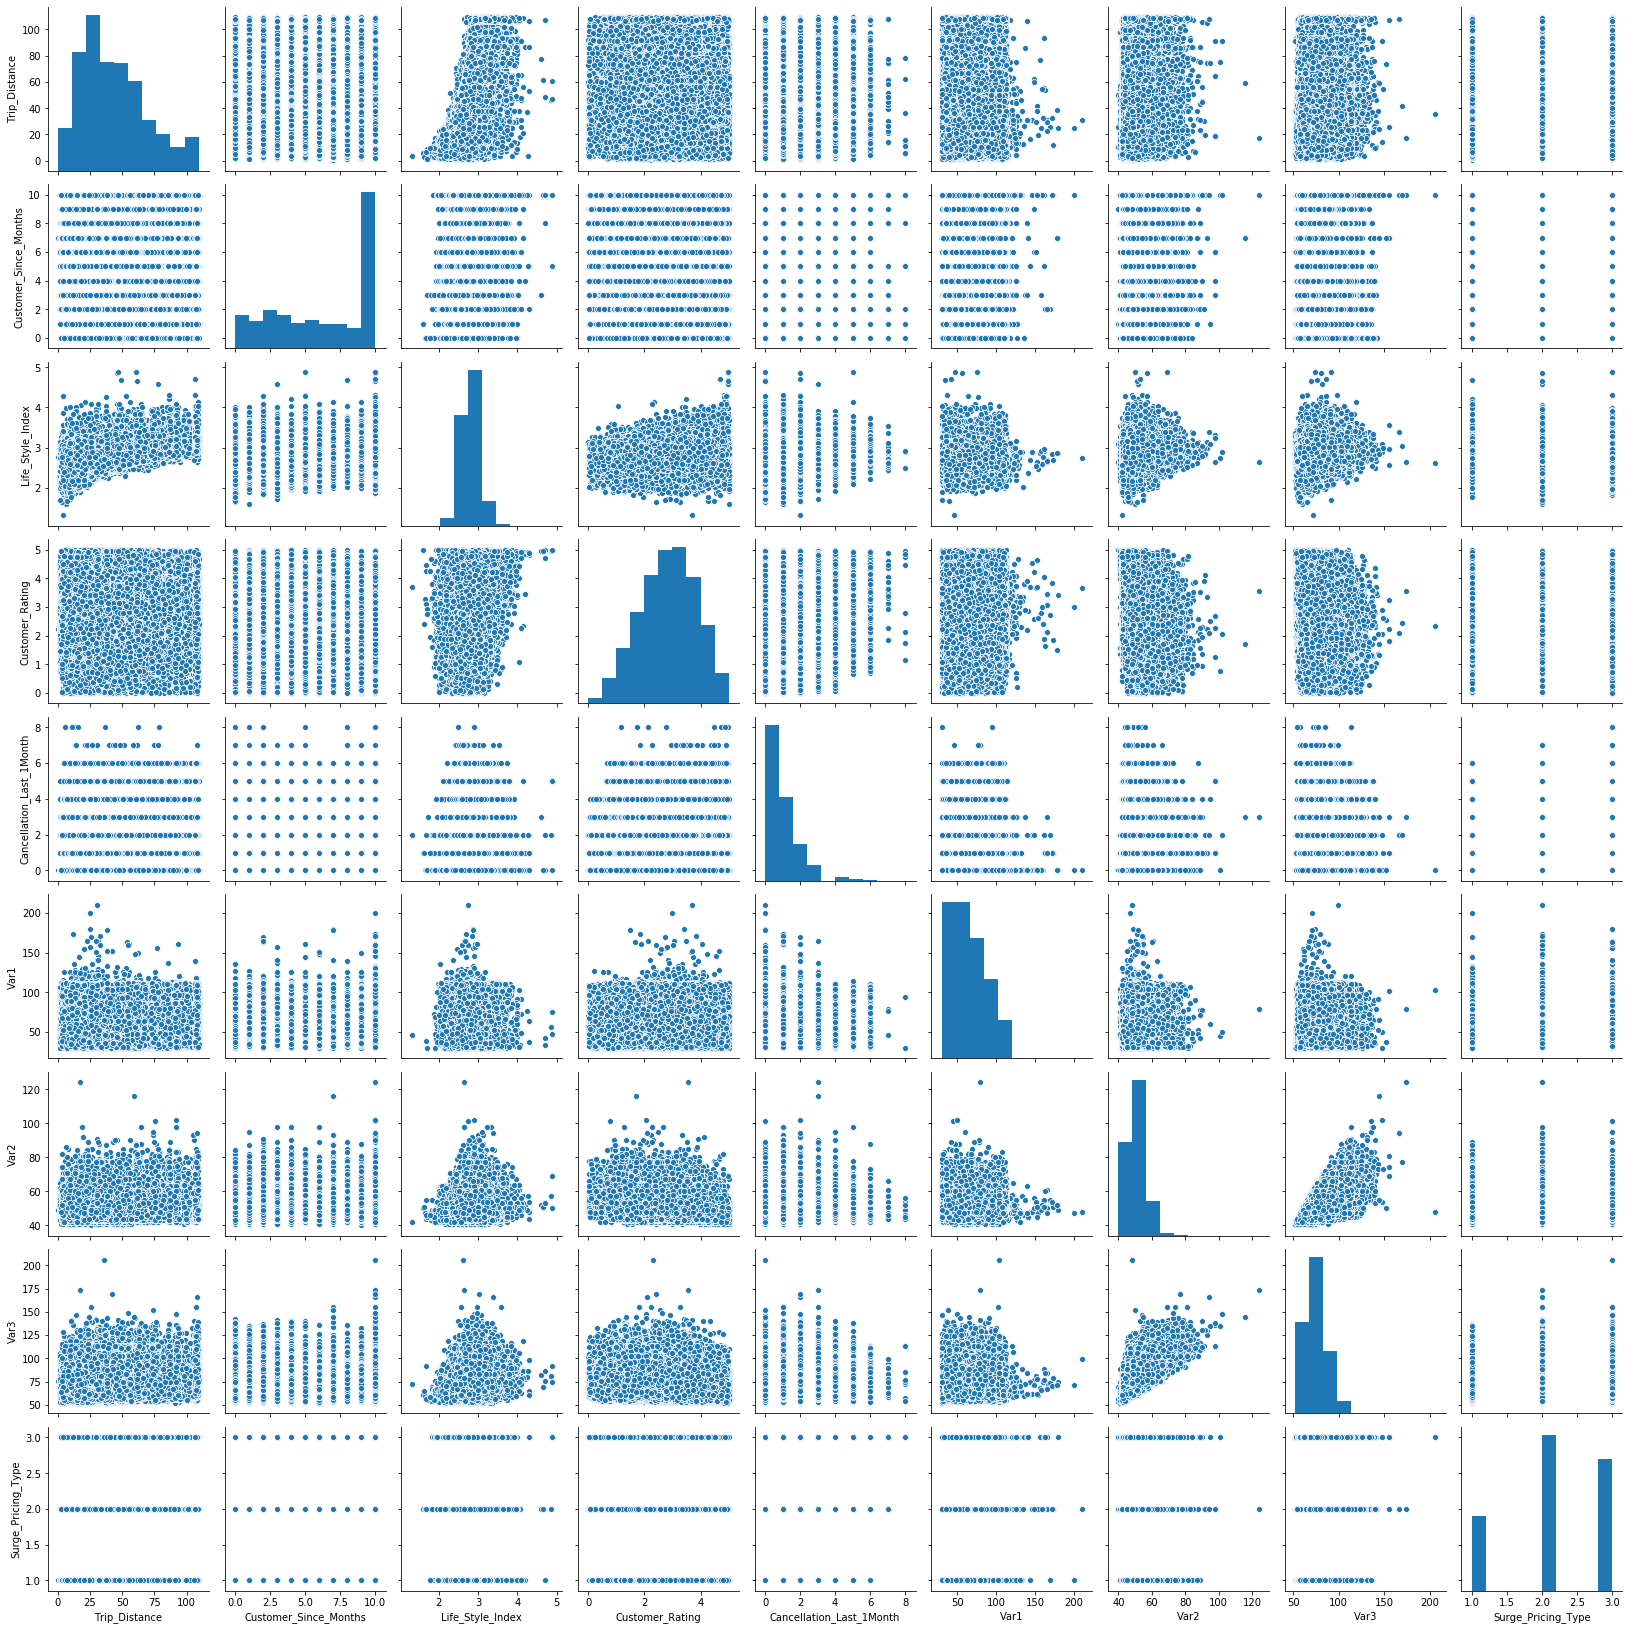

In [7]:
sns.pairplot(df)

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])
df["Customer_Since_Months"].fillna(df["Customer_Since_Months"].mode()[0],inplace=True)
df["Life_Style_Index"].fillna(df["Life_Style_Index"].mean(),inplace=True)
df["Type_of_Cab"].fillna("unknown",inplace=True)
df["Confidence_Life_Style_Index"].fillna("unknown",inplace=True)
df=df.drop(["Var1","Trip_ID","Var2"],axis=1)

In [8]:
df.isnull().sum()

Trip_Distance                      0
Type_of_Cab                        0
Customer_Since_Months              0
Life_Style_Index                   0
Confidence_Life_Style_Index        0
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var3                               0
Gender                             0
Surge_Pricing_Type             87395
dtype: int64

In [9]:
df_dummies=pd.get_dummies(df[df.select_dtypes(include=['object']).columns.tolist()])
df_num=df[df.select_dtypes(include=[np.number]).columns.tolist()]
#df_num_norm=(finaldf_num-finaldf_num.mean())/finaldf_num.std()
df=pd.concat([df_num,df_dummies],axis=1)


In [10]:
df=df.drop(["Type_of_Cab_A","Confidence_Life_Style_Index_A","Destination_Type_A"],axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 219057 entries, ('train', 0) to ('test', 87394)
Data columns (total 29 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Trip_Distance                        219057 non-null  float64
 1   Customer_Since_Months                219057 non-null  float64
 2   Life_Style_Index                     219057 non-null  float64
 3   Customer_Rating                      219057 non-null  float64
 4   Cancellation_Last_1Month             219057 non-null  int64  
 5   Var3                                 219057 non-null  int64  
 6   Gender                               219057 non-null  int32  
 7   Surge_Pricing_Type                   131662 non-null  float64
 8   Type_of_Cab_B                        219057 non-null  uint8  
 9   Type_of_Cab_C                        219057 non-null  uint8  
 10  Type_of_Cab_D                        219057 non-null  uint8 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [13]:
x=df.drop(["Surge_Pricing_Type"],axis=1)
x1=x.iloc[0:131662]
y=df["Surge_Pricing_Type"]
y1=y.iloc[0:131662]
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=0)

In [ ]:
from sklearn.svm import SVC
classifier=SVC(kernel="linear")
classifier.fit(x_train,y_train)
y_train_pred3=classifrier.praedict(x_train)
print("Accuracy",metrics.accuracy_score(y_train,y_train_pred3))
y_pred3=classifier.predict(x_test)
print("Accuracy",metrics.accuracy_score(y_test,y_pred3))

In [23]:
!pip install lightgbm
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(x_train,y_train)
y_train_pred3=model.predict(x_train)
print("Accuracy",metrics.accuracy_score(y_train,y_train_pred3))
y_pred3=model.predict(x_test)
print("Accuracy",metrics.accuracy_score(y_test,y_pred3))

Accuracy 0.7100897323220815
Accuracy 0.6996126484214791


In [25]:
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(x_train,y_train)
y_train_pred4=xg.predict(x_train)
print("Accuracy",accuracy_score(y_train,y_train_pred4))
y_pred4=xg.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred4))

Accuracy 0.7372372861126483
Accuracy 0.6982961593964404


In [14]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_train_pred2=rf.predict(x_train)
print("Accuracy",metrics.accuracy_score(y_train,y_train_pred2))
y_pred2=rf.predict(x_test)
print("Accuracy",metrics.accuracy_score(y_test,y_pred2))

Accuracy 1.0
Accuracy 0.6878401984860376


In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(x_train, y_train)
y_train_pred=knn.predict(x_train)
print("Accuracy",metrics.accuracy_score(y_train,y_train_pred))
y_pred=rf.predict(x_test)
print("Accuracy",metrics.accuracy_score(y_test,y_pred))

Accuracy 0.7256057202999034
Accuracy 0.6878401984860376


In [25]:
x2=df.drop(["Surge_Pricing_Type"],axis=1)
train_x=x2.iloc[0:131662,:]
y2=df["Surge_Pricing_Type"]
train_y=y2.iloc[0:131662,]
test_x=x2.iloc[131662:,:]
test_y=y2.iloc[131662:,]

In [26]:
!pip install lightgbm
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(train_x,train_y)
y_train_pred3=model.predict(train_x)
print("Accuracy",metrics.accuracy_score(train_y,y_train_pred3))
y_pred3=model.predict(test_x)


Accuracy 0.707409882881925


In [27]:
train_y.isnull().sum()

0

In [28]:
d1=pd.DataFrame(y_pred3)
d2=pd.DataFrame(df2["Trip_ID"])
d3=pd.concat([d1,d2],axis=1)
d3.to_csv("E://Mobilit_analytics.csv")